# General settings

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import pandas as pd
import numpy as np
from dimdate import create_dimdate, add_holidays

In [58]:
pd.set_option('display.max_columns', None)

In [59]:
EXCEL_FILE    = 'data/on-duty-2024.xlsx'
HOLIDAYS_FILE = 'data/holidays.csv'
START_DATE = '2024-01-01'
END_DATE   = '2024-12-31'

# Dimdate generation

In [60]:
holidays = pd.read_csv(HOLIDAYS_FILE)

dimdate = create_dimdate(START_DATE, END_DATE)
dimdate = add_holidays(dimdate, list(holidays['holidays']))
dimdate

,Date,DayOfWeek,DayOfWeekText,DayOfWeekShort,IsWeekend,IsHoliday,DaysToHoliday
0,2024-01-01,1,Monday,Mon,0,1,0
1,2024-01-02,2,Tuesday,Tue,0,0,1
2,2024-01-03,3,Wednesday,Wed,0,0,2
3,2024-01-04,4,Thursday,Thu,0,0,3
4,2024-01-05,5,Friday,Fri,0,0,4
...,...,...,...,...,...,...,...
361,2024-12-27,5,Friday,Fri,0,1,0
362,2024-12-28,6,Saturday,Sat,1,1,0
363,2024-12-29,7,Sunday,Sun,1,1,0
364,2024-12-30,1,Monday,Mon,0,1,0


# Import excel data

# Study

## Display holidays

<Axes: xlabel='Date'>

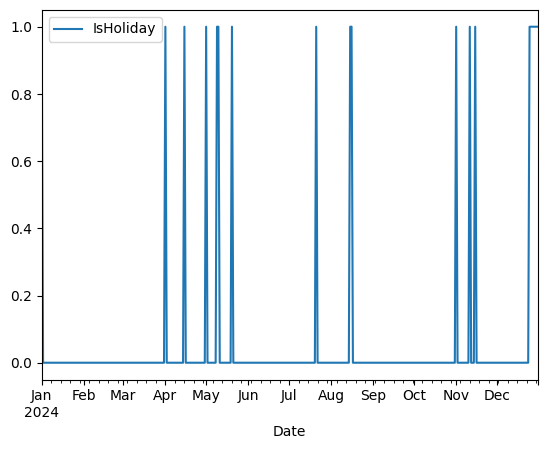

In [61]:
dimdate.plot(x='Date', y='IsHoliday')

## Display number of days to holidays

<Axes: >

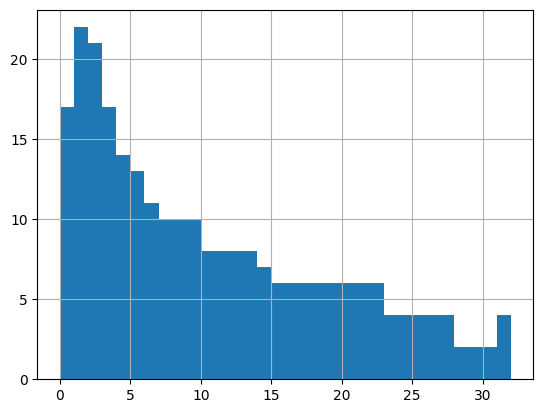

In [62]:
dimdate.loc[dimdate['IsWeekend'] == 0, 'DaysToHoliday'].hist(bins=32)

<Axes: xlabel='Date'>

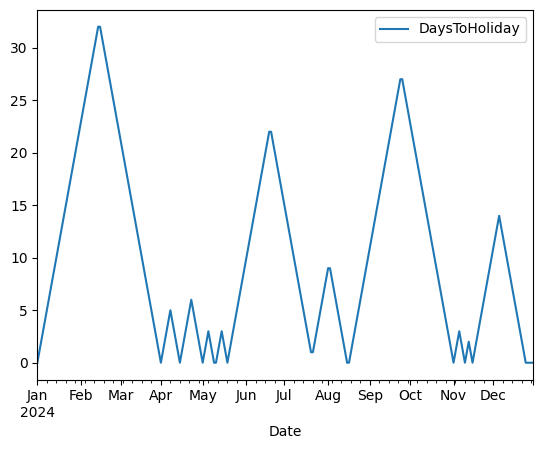

In [63]:
no_weekend = dimdate[ (dimdate['IsWeekend'] == 0) ]
no_weekend.plot(x='Date', y='DaysToHoliday')